In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import get_trial_dataframe
from utils import get_trial_paths
from utils import analysis_pipeline
from utils import modeling

In [70]:
# Replace with the path to the logs directory in multi-memory-task
logs_path = 'C:\\Users\\isami\\Dropbox\\multi-memory' 

# Replace this with the name of the dataset directories
datasets = ["2023_07_18_11_31_09",
"2023_07_18_11_58_28","2023_07_18_13_44_54",
"2023_07_18_13_46_05",
"2023_07_18_14_06_59",
"2023_07_18_17_16_22",
"2023_07_19_10_01_36",
"2023_07_19_10_22_23",
"2023_07_18_11_08_50",
"2023_07_25_09_06_21",
"2023_07_25_09_15_18",
"2023_07_25_09_32_48",
"2023_07_25_09_44_59"]

trial_paths = get_trial_paths.get_trial_paths(logs_path=logs_path, datasets=datasets)
df = get_trial_dataframe.get_trial_dataframe(trial_paths=trial_paths)


Number of trials:  1512


In [71]:
df.columns

Index(['trial_num', 'time', 'block_id', 'visible', 'fixed', 'ltm',
       'object_0_x', 'object_0_y', 'object_0_id', 'object_0_theta',
       'object_1_x', 'object_1_y', 'object_1_id', 'object_1_theta',
       'object_2_x', 'object_2_y', 'object_2_id', 'object_2_theta',
       'object_3_x', 'object_3_y', 'object_3_id', 'object_3_theta',
       'object_4_x', 'object_4_y', 'object_4_id', 'object_4_theta',
       'object_5_x', 'object_5_y', 'object_5_id', 'object_5_theta',
       'target_id', 'target_x', 'target_y', 'target_theta', 'num_object',
       'response_object_ind', 'response_x', 'response_id', 'response_theta',
       'correct', 'reaction_time_steps', 'response_y', 'visible_s', 'delay_s'],
      dtype='object')

In [107]:
df

,trial_num,time,block_id,visible,fixed,ltm,object_0_x,object_0_y,object_0_id,object_0_theta,...,response_y,visible_s,delay_s,precision_difference_0,precision_difference_0_abs,rounded_delay_s,delay_bins,rounded_visible_s,visible_bins,precision_difference
0,1,1.689694e+09,000418,1,True,False,0.237804,0.645785,001433,-1.063346,...,0.663446,1.998600,0.499879,0.184458,0.184458,0.5,0,2.0,2,0.184458
3,4,1.689694e+09,000673,1,True,False,0.342039,0.244954,000775,-2.587070,...,0.711609,2.000648,1.499261,-3.123512,3.123512,1.5,1,2.0,2,0.018080
4,5,1.689694e+09,000277,1,True,False,0.535169,0.202069,000239,3.024092,...,0.779226,1.999778,0.500380,3.110383,3.110383,0.5,0,2.0,2,-0.031209
7,9,1.689694e+09,000387,1,True,False,0.321542,0.258851,001042,-2.504503,...,0.791416,1.998730,0.500993,2.307175,2.307175,0.5,0,2.0,2,0.212780
13,15,1.689694e+09,000515,1,True,False,0.619395,0.775218,001263,0.409317,...,0.739952,1.499182,3.000523,-0.102709,0.102709,3.0,3,1.5,1,-0.102709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,1502,1.690293e+09,000537,1,True,False,0.615477,0.223115,000183,2.746468,...,0.182817,1.000021,1.499974,-0.056767,0.056767,1.5,1,1.0,0,-0.056767
1342,1503,1.690293e+09,000733,1,True,False,0.799836,0.509911,001003,1.537755,...,0.428184,1.499863,0.500016,0.350910,0.350910,0.5,0,1.5,1,0.350910
1343,1506,1.690293e+09,000121,1,True,False,0.205305,0.556166,000836,-1.382465,...,0.185196,1.499448,2.999906,-1.151273,1.151273,3.0,3,1.5,1,-0.104076
1344,1509,1.690293e+09,000160,1,True,False,0.758794,0.348258,000832,2.101112,...,0.354903,0.499625,2.998634,0.335856,0.335856,3.0,3,0.5,0,0.335856


In [72]:
df = df[df['fixed'] == 1]

,trial_num,time,block_id,visible,fixed,ltm,object_0_x,object_0_y,object_0_id,object_0_theta,...,response_y,visible_s,delay_s,precision_difference_0,precision_difference_0_abs,rounded_delay_s,delay_bins,rounded_visible_s,visible_bins,precision_difference
0,1,1.689694e+09,000418,1,True,False,0.237804,0.645785,001433,-1.063346,...,0.663446,1.998600,0.499879,0.184458,0.184458,0.5,0,2.0,2,0.184458
3,4,1.689694e+09,000673,1,True,False,0.342039,0.244954,000775,-2.587070,...,0.711609,2.000648,1.499261,-3.123512,3.123512,1.5,1,2.0,2,0.018080
4,5,1.689694e+09,000277,1,True,False,0.535169,0.202069,000239,3.024092,...,0.779226,1.999778,0.500380,3.110383,3.110383,0.5,0,2.0,2,-0.031209
7,9,1.689694e+09,000387,1,True,False,0.321542,0.258851,001042,-2.504503,...,0.791416,1.998730,0.500993,2.307175,2.307175,0.5,0,2.0,2,0.212780
13,15,1.689694e+09,000515,1,True,False,0.619395,0.775218,001263,0.409317,...,0.739952,1.499182,3.000523,-0.102709,0.102709,3.0,3,1.5,1,-0.102709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,1502,1.690293e+09,000537,1,True,False,0.615477,0.223115,000183,2.746468,...,0.182817,1.000021,1.499974,-0.056767,0.056767,1.5,1,1.0,0,-0.056767
1342,1503,1.690293e+09,000733,1,True,False,0.799836,0.509911,001003,1.537755,...,0.428184,1.499863,0.500016,0.350910,0.350910,0.5,0,1.5,1,0.350910
1343,1506,1.690293e+09,000121,1,True,False,0.205305,0.556166,000836,-1.382465,...,0.185196,1.499448,2.999906,-1.151273,1.151273,3.0,3,1.5,1,-0.104076
1344,1509,1.690293e+09,000160,1,True,False,0.758794,0.348258,000832,2.101112,...,0.354903,0.499625,2.998634,0.335856,0.335856,3.0,3,0.5,0,0.335856


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Delay Time Effect on vSTM')

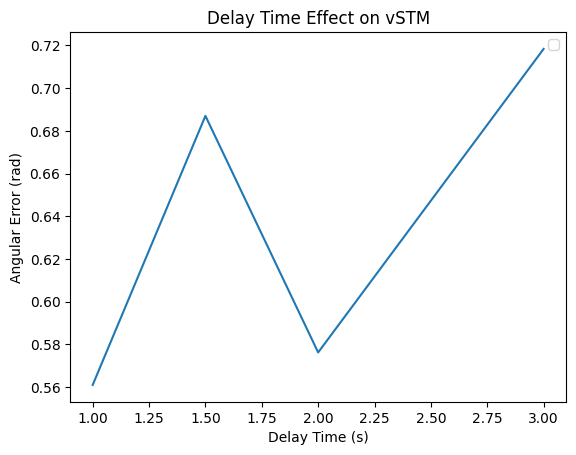

In [110]:
precision_difference_arr = []

for (row_index,row_data) in df.iterrows():
    precision_difference_arr.append(analysis_pipeline.find_angular_dist(row_data['object_0_theta'],row_data['response_theta']))

df['precision_difference_0'] = precision_difference_arr
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()

ylabel = 'Angular Distance from Target (rad)'

analysis_pipeline.round('delay_s',df)
_,bins = pd.qcut(df['rounded_delay_s'],4,duplicates='drop', retbins=True)
df['delay_bins'] = pd.qcut(df['rounded_delay_s'], q=4, labels=np.round(bins[1:], 1))
fig,ax = plt.subplots()
ax.plot(df.groupby('delay_bins').precision_difference_0_abs.mean())
plt.legend()
plt.xlabel('Delay Time (s)')
plt.ylabel('Angular Error (rad)')
plt.title('Delay Time Effect on vSTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Delay Time Effect on vSTM')

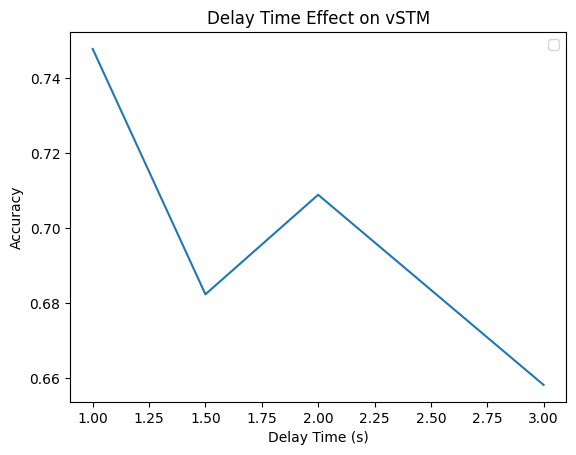

In [111]:
fig,ax = plt.subplots()
ax.plot(df.groupby('delay_bins').correct.mean())
plt.legend()
plt.xlabel('Delay Time (s)')
plt.ylabel('Accuracy')
plt.title('Delay Time Effect on vSTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Encoding Time Effect on vSTM')

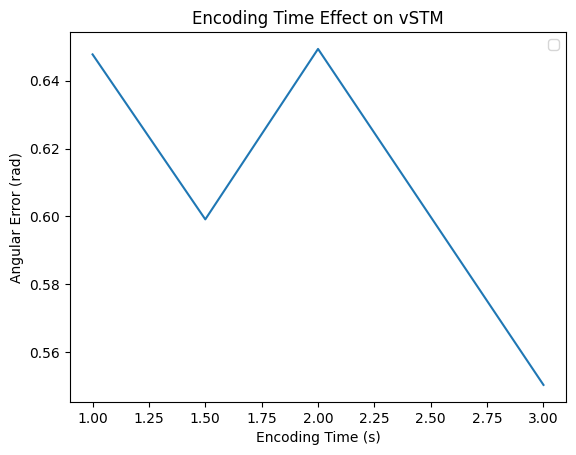

In [112]:
analysis_pipeline.round('visible_s',df)
_,bins = pd.qcut(df['rounded_visible_s'],4,duplicates='drop', retbins=True)
df['visible_bins'] = pd.qcut(df['rounded_visible_s'], q=4, labels=np.round(bins[1:], 1))
fig,ax = plt.subplots()
ax.plot(df.groupby('visible_bins').precision_difference_0_abs.mean())
plt.legend()
plt.xlabel('Encoding Time (s)')
plt.ylabel('Angular Error (rad)')
plt.title('Encoding Time Effect on vSTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Encoding Time Effect on vSTM')

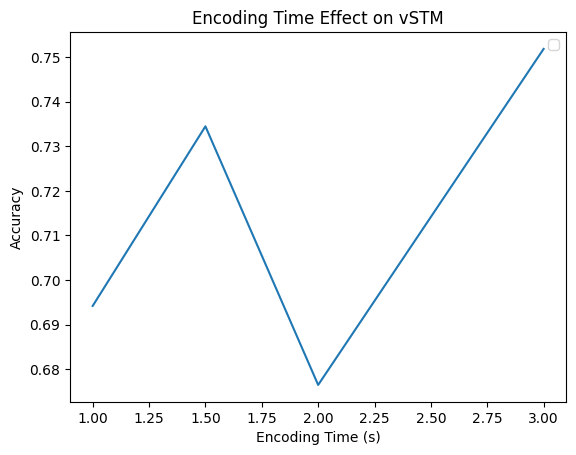

In [113]:
fig,ax = plt.subplots()
ax.plot(df.groupby('visible_bins').correct.mean())
plt.legend()
plt.xlabel('Encoding Time (s)')
plt.ylabel('Accuracy')
plt.title('Encoding Time Effect on vSTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Set Size Effect on vSTM')

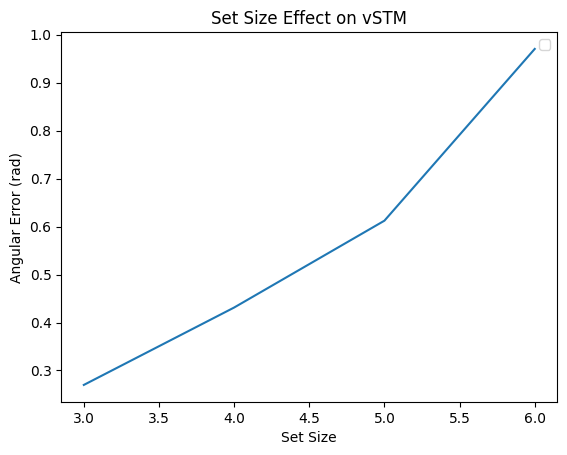

In [77]:
fig,ax = plt.subplots()
ax.plot(df.groupby('num_object').precision_difference_0_abs.mean())
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Angular Error (rad)')
plt.title('Set Size Effect on vSTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Set Size Effect on vSTM')

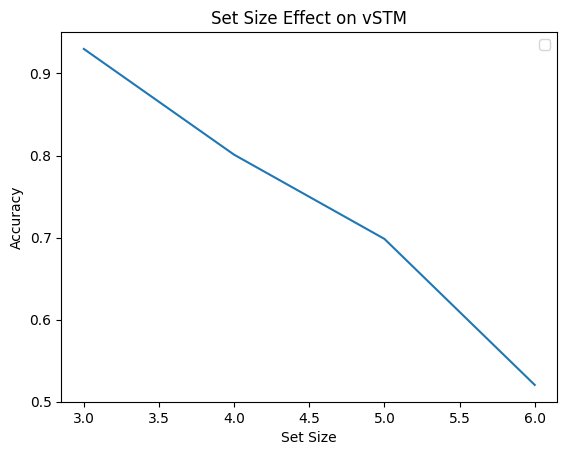

In [101]:
fig,ax = plt.subplots()
ax.plot(df.groupby('num_object').correct.mean())
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Accuracy')
plt.title('Set Size Effect on vSTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Difference in Angular Error from Target (vSTM Incorrect Trials)')

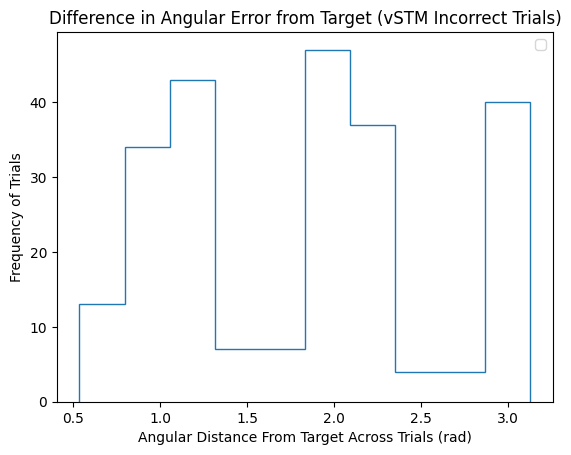

In [79]:
incorrect_df = df[df['correct'] == 0]
fig,ax = plt.subplots()
ax.hist(incorrect_df.precision_difference_0_abs, histtype = 'step')
plt.legend()
plt.xlabel('Angular Distance From Target Across Trials (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Target (vSTM Incorrect Trials)')

(array([38.,  0., 44.,  0., 54.,  0., 46.,  0.,  0., 54.]),
 array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 [<matplotlib.patches.Polygon at 0x2479d564f50>])

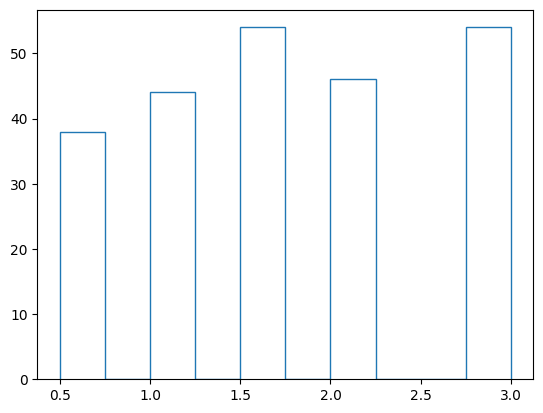

In [108]:
fig,ax = plt.subplots()
ax.hist(incorrect_df.rounded_delay_s, histtype = 'step')

Text(0.5, 1.0, 'Difference in Angular Error from Target (vSTM Incorrect Trials)')

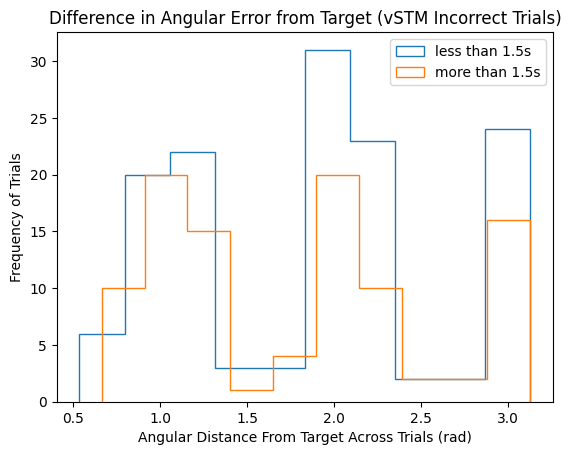

In [109]:
incorrect_df = df[df['correct'] == 0]
delay_df1 = incorrect_df[incorrect_df['rounded_delay_s'] <= 1.5 ]
delay_df2 = incorrect_df[incorrect_df['rounded_delay_s'] > 1.5]
fig,ax = plt.subplots()
ax.hist(delay_df1.precision_difference_0_abs, histtype = 'step', label="less than 1.5s")
ax.hist(delay_df2.precision_difference_0_abs, histtype = 'step', label= "more than 1.5s")
plt.legend()
plt.xlabel('Angular Distance From Target Across Trials (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Target (vSTM Incorrect Trials)')

In [105]:
len(incorrect_df)

236

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Difference in Angular Error from Target (vSTM Incorrect Trials)')

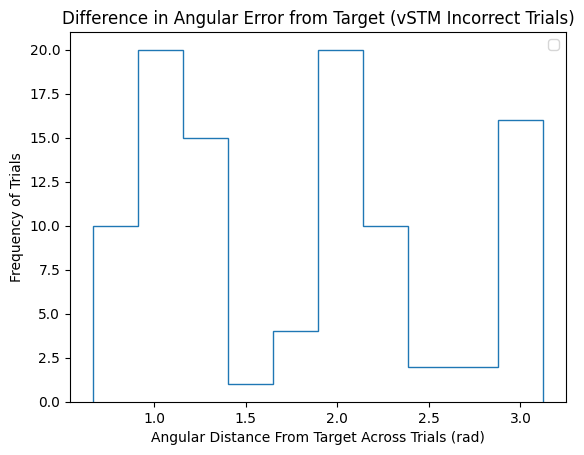

In [103]:
incorrect_df = df[df['correct'] == 0]
delay_df2 = incorrect_df[incorrect_df['rounded_delay_s'] >= 2]
fig,ax = plt.subplots()
ax.hist(delay_df2.precision_difference_0_abs, histtype = 'step')
plt.legend()
plt.xlabel('Angular Distance From Target Across Trials (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Target (vSTM Incorrect Trials)')

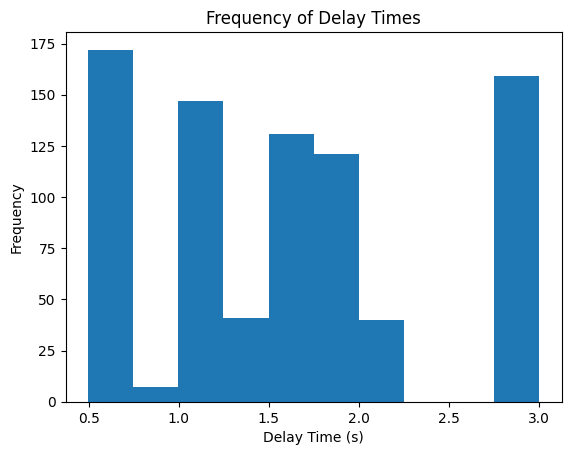

In [81]:
analysis_pipeline.plot_hist('delay_s',df,"Delay Time (s)", "Frequency of Delay Times")

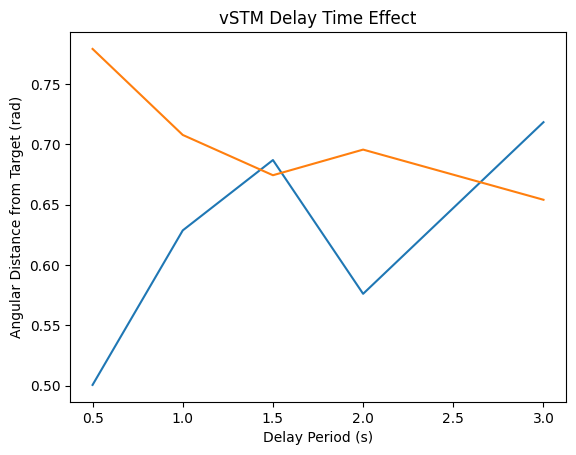

In [82]:
analysis_pipeline.round('delay_s',df)
analysis_pipeline.plot_error('rounded_delay_s',df,'Delay Period (s)','vSTM Delay Time Effect on Error')
analysis_pipeline.plot_accuracy('rounded_delay_s',df,'Delay Period (s)','vSTM Delay Time Effect')

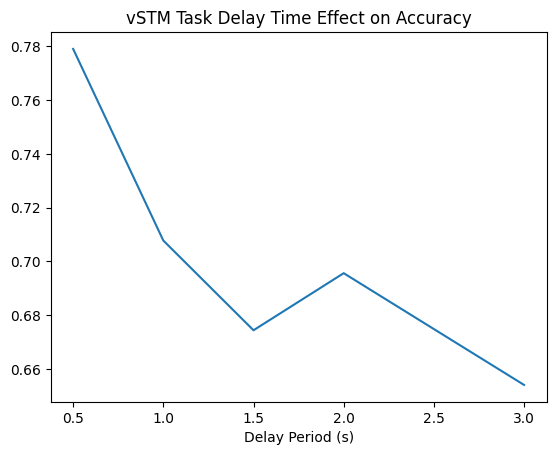

In [83]:
analysis_pipeline.plot_accuracy('rounded_delay_s',df,'Delay Period (s)','vSTM Task Delay Time Effect on Accuracy')

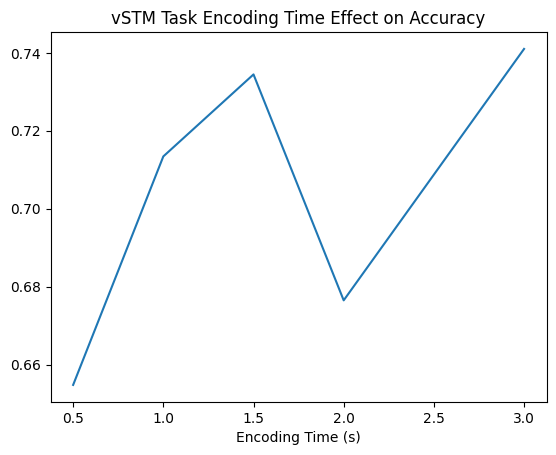

In [84]:
analysis_pipeline.round('visible_s',df)
analysis_pipeline.plot_accuracy('rounded_visible_s',df,'Encoding Time (s)','vSTM Task Encoding Time Effect on Accuracy')

<Axes: xlabel='rounded_delay_s', ylabel='mean_accuracy'>

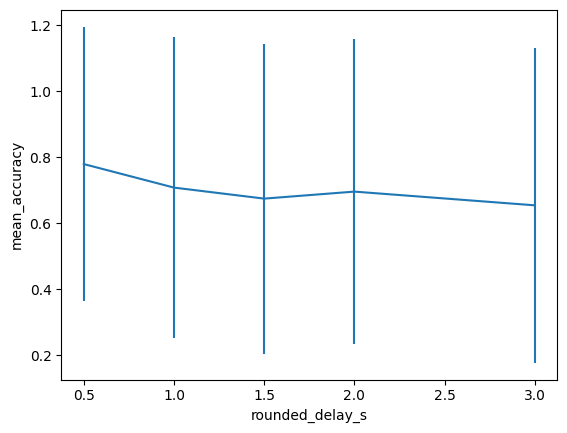

In [85]:
delay_std = df.groupby('rounded_delay_s').correct.std()
df.groupby('rounded_delay_s').correct.mean().plot(ylabel='mean_accuracy', yerr=delay_std)

<Axes: xlabel='rounded_visible_s', ylabel='mean_accuracy'>

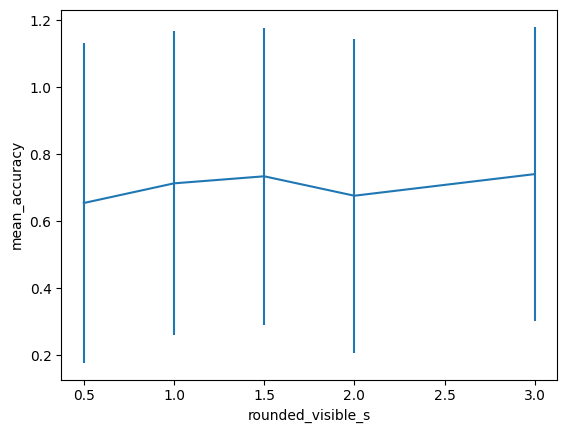

In [86]:
delay_std = df.groupby('rounded_visible_s').correct.std()
df.groupby('rounded_visible_s').correct.mean().plot(ylabel='mean_accuracy', yerr=delay_std)

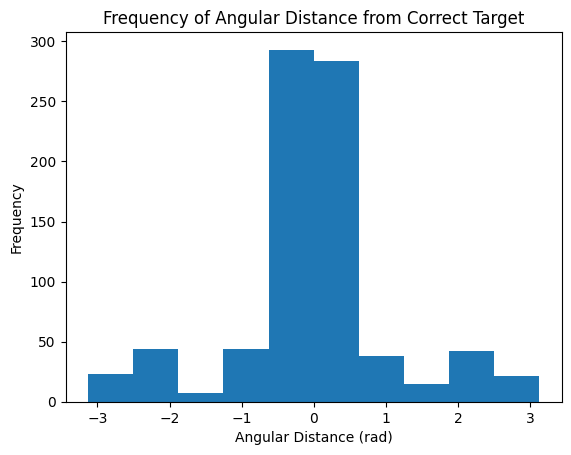

In [87]:
# plotting the distribution of distance from the response to the correct response
analysis_pipeline.plot_hist('precision_difference_0',df,"Angular Distance (rad)","Frequency of Angular Distance from Correct Target")


In [88]:
df['correct']

0        True
3       False
4       False
7       False
13       True
        ...  
1341     True
1342     True
1343    False
1344     True
1345    False
Name: correct, Length: 818, dtype: bool

In [89]:
df = df[pd.isna(df['response_object_ind'])==False]
sum(pd.isna(df['response_object_ind']))

0

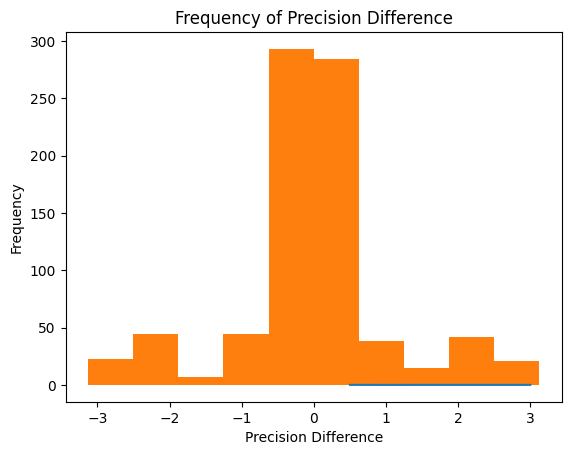

In [90]:
#plotting the distribution of distance from the response to the actual target (regardless of correctness)
analysis_pipeline.plot_precision('rounded_delay_s',df,"Delay Time", "delay effect on precision")
analysis_pipeline.plot_hist("precision_difference_0",df,"Precision Difference", "Frequency of Precision Difference")


Text(0.5, 0, '')

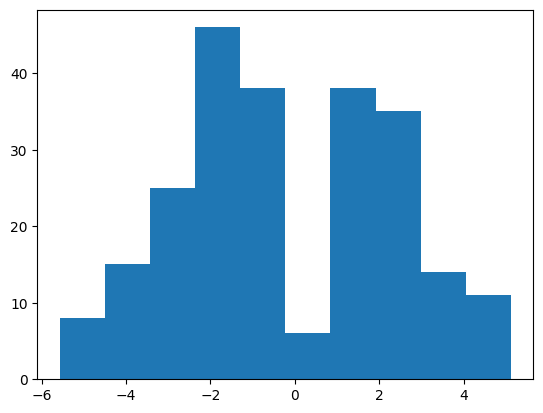

In [91]:
#plotting distribution of how incorrect you are. 
#isolated by incorrect trials and distance from the target is calculated
i = 0
s = 'object_' + str(i) + '_theta'
response_precision_arr = []

for (row_index,row_data) in df.iterrows():
    if (row_data['correct'] == False):
        i = row_data['response_object_ind']
        response_precision_arr.append(row_data[s] - row_data['response_theta'])

plt.hist(response_precision_arr)
plt.xlabel('')

In [92]:
df

,trial_num,time,block_id,visible,fixed,ltm,object_0_x,object_0_y,object_0_id,object_0_theta,...,response_y,visible_s,delay_s,precision_difference_0,precision_difference_0_abs,rounded_delay_s,delay_bins,rounded_visible_s,visible_bins,precision_difference
0,1,1.689694e+09,000418,1,True,False,0.237804,0.645785,001433,-1.063346,...,0.663446,1.998600,0.499879,0.184458,0.184458,0.5,0,2.0,2,0.184458
3,4,1.689694e+09,000673,1,True,False,0.342039,0.244954,000775,-2.587070,...,0.711609,2.000648,1.499261,-3.123512,3.123512,1.5,1,2.0,2,0.018080
4,5,1.689694e+09,000277,1,True,False,0.535169,0.202069,000239,3.024092,...,0.779226,1.999778,0.500380,3.110383,3.110383,0.5,0,2.0,2,-0.031209
7,9,1.689694e+09,000387,1,True,False,0.321542,0.258851,001042,-2.504503,...,0.791416,1.998730,0.500993,2.307175,2.307175,0.5,0,2.0,2,0.212780
13,15,1.689694e+09,000515,1,True,False,0.619395,0.775218,001263,0.409317,...,0.739952,1.499182,3.000523,-0.102709,0.102709,3.0,3,1.5,1,-0.102709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,1502,1.690293e+09,000537,1,True,False,0.615477,0.223115,000183,2.746468,...,0.182817,1.000021,1.499974,-0.056767,0.056767,1.5,1,1.0,0,-0.056767
1342,1503,1.690293e+09,000733,1,True,False,0.799836,0.509911,001003,1.537755,...,0.428184,1.499863,0.500016,0.350910,0.350910,0.5,0,1.5,1,0.350910
1343,1506,1.690293e+09,000121,1,True,False,0.205305,0.556166,000836,-1.382465,...,0.185196,1.499448,2.999906,-1.151273,1.151273,3.0,3,1.5,1,-0.104076
1344,1509,1.690293e+09,000160,1,True,False,0.758794,0.348258,000832,2.101112,...,0.354903,0.499625,2.998634,0.335856,0.335856,3.0,3,0.5,0,0.335856


<Axes: title={'center': 'vSTM Task Delay Time Effect on Error'}, xlabel='Delay Time (s)', ylabel='Error (rad)'>

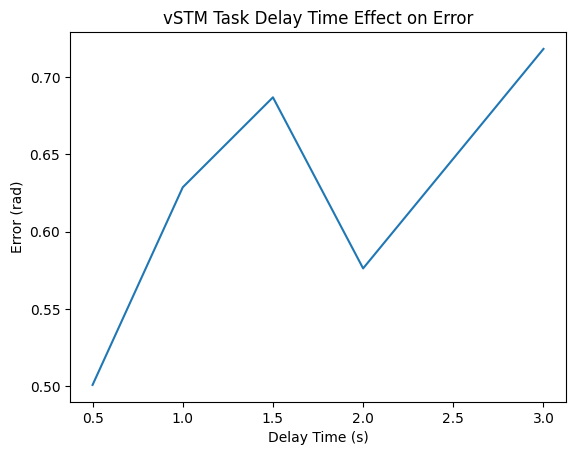

In [93]:
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()
df.groupby('rounded_delay_s').precision_difference_0_abs.mean().plot(xlabel= 'Delay Time (s)', ylabel='Error (rad)', title='vSTM Task Delay Time Effect on Error')

<Axes: title={'center': 'vSTM Task Encoding Time Effect on Error'}, xlabel='Encoding Time (s)', ylabel='Error (rad)'>

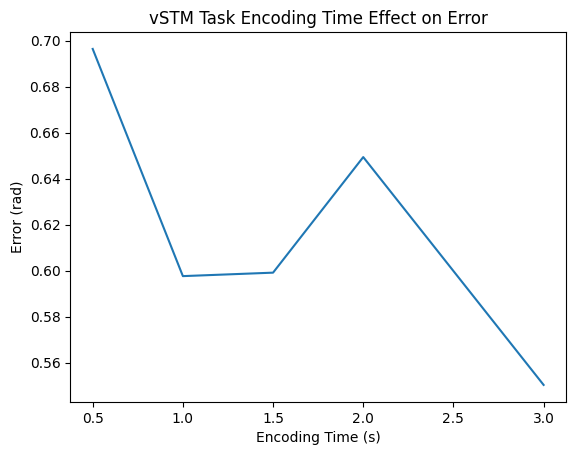

In [94]:
delay_std = df.groupby('rounded_visible_s').correct.std()
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()
df.groupby('rounded_visible_s').precision_difference_0_abs.mean().plot(xlabel= 'Encoding Time (s)', ylabel='Error (rad)', title='vSTM Task Encoding Time Effect on Error')

In [95]:
df['num_object']

0       4
3       3
4       6
7       5
13      5
       ..
1341    3
1342    5
1343    5
1344    4
1345    5
Name: num_object, Length: 811, dtype: int64

<Axes: title={'center': 'vSTM Task Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

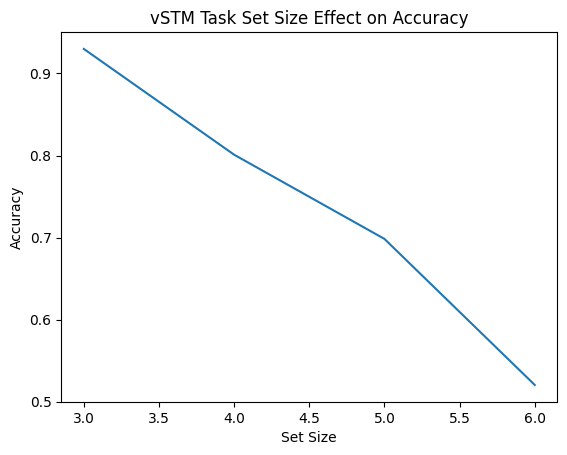

In [96]:
df.groupby('num_object').correct.mean().plot(xlabel= 'Set Size', ylabel='Accuracy', title='vSTM Task Set Size Effect on Accuracy')

<Axes: title={'center': 'vSTM Task Set Size Effect on Error'}, xlabel='Set Size', ylabel='Error (rad)'>

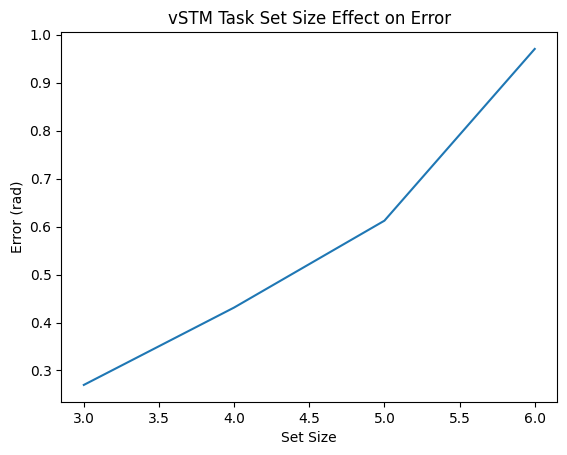

In [97]:
df.groupby('num_object').precision_difference_0_abs.mean().plot(xlabel= 'Set Size', ylabel='Error (rad)', title='vSTM Task Set Size Effect on Error')

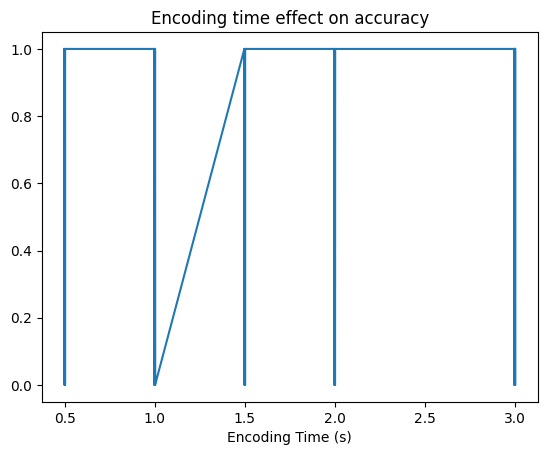

In [98]:
analysis_pipeline.plot_accuracy("visible_s",df, "Encoding Time (s)", "Encoding time effect on accuracy" )

In [99]:
analysis_pipeline.plot_SD(df,'rounded_delay_s')

TypeError: plot_SD() missing 2 required positional arguments: 'xlabel' and 'title'

In [ ]:
analysis_pipeline.plot_SD(df,'rounded_visible_s')

KeyError: 'rounded_visible_s'

In [ ]:
df.delay_s.unique()

array([0.81231117, 0.799963  , 1.60071206, 1.20064831, 1.60097718,
       0.79985094, 0.39985895, 0.39957213, 1.60122514, 1.60059977,
       1.59971976, 0.40072775, 0.80047321, 0.800488  , 1.20034218,
       1.60047078, 1.20042205, 1.61445117, 2.4014318 , 1.60022187,
       1.20138907, 1.20128584, 1.20036674, 1.6012671 , 2.4126389 ,
       2.4008379 , 1.20044398, 1.60043812, 0.80166173, 0.80055022,
       2.40099716, 2.40134025, 0.40061522, 0.80010176, 1.200387  ,
       0.40079713, 2.4017849 , 1.60113502, 2.41415715, 0.39975977,
       0.79970407, 0.39992809, 0.40164924, 0.80054402, 1.20153117,
       1.600739  , 2.40076518, 0.80002093, 0.39967895, 2.40106201,
       2.40078807, 0.41263103, 0.39963984, 1.20043397, 0.40022087,
       2.40109682, 0.79998493, 1.20156884, 0.39933395, 0.4002111 ,
       1.19939494, 0.40062404, 1.60030723, 0.39990711, 0.40030098,
       2.40050507, 1.21321774, 0.39884281, 1.20125532, 0.79932404,
       0.39949083, 0.39970708, 1.20044589, 1.20059299, 2.40176

In [ ]:
df.columns

Index(['trial_num', 'time', 'block_id', 'visible', 'ltm', 'object_0_x',
       'object_0_y', 'object_0_id', 'object_0_theta', 'object_1_x',
       'object_1_y', 'object_1_id', 'object_1_theta', 'object_2_x',
       'object_2_y', 'object_2_id', 'object_2_theta', 'object_3_x',
       'object_3_y', 'object_3_id', 'object_3_theta', 'object_4_x',
       'object_4_y', 'object_4_id', 'object_4_theta', 'object_5_x',
       'object_5_y', 'object_5_id', 'object_5_theta', 'target_id', 'target_x',
       'target_y', 'target_theta', 'num_object', 'response_object_ind',
       'response_x', 'response_id', 'response_theta', 'correct',
       'reaction_time_steps', 'response_y', 'visible_s', 'delay_s',
       'rounded_delay_s', 'precision_difference_0',
       'precision_difference_0_abs'],
      dtype='object')

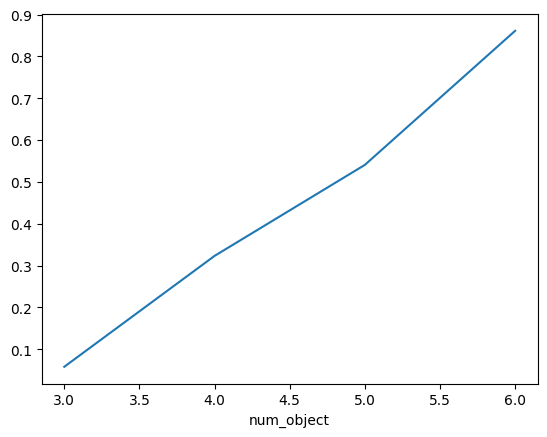

In [ ]:
analysis_pipeline.plot_SD(df,'num_object')

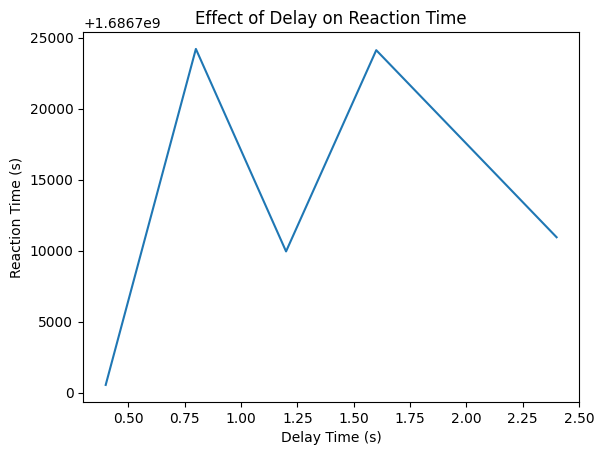

In [ ]:
analysis_pipeline.plot_rt('rounded_delay_s',df,"Delay Time (s)","Effect of Delay on Reaction Time")

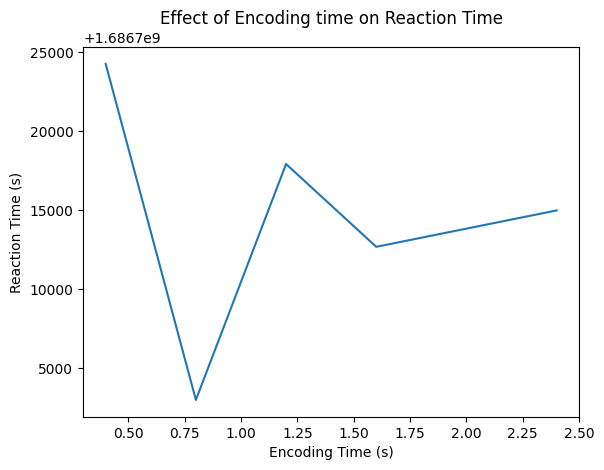

In [ ]:
analysis_pipeline.plot_rt('rounded_visible_s',df,"Encoding Time (s)","Effect of Encoding time on Reaction Time")

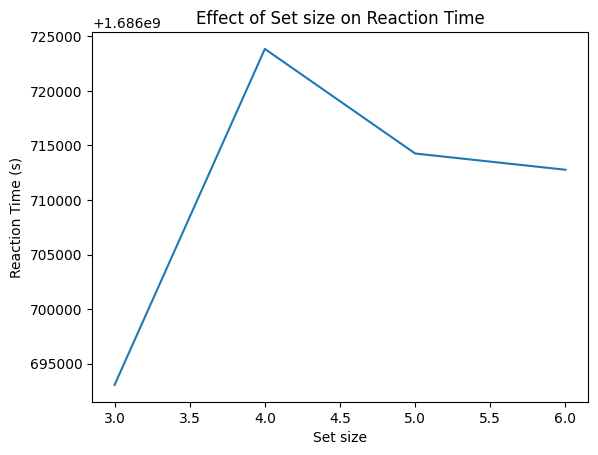

In [ ]:
analysis_pipeline.plot_rt('num_object',df,"Set size","Effect of Set size on Reaction Time")

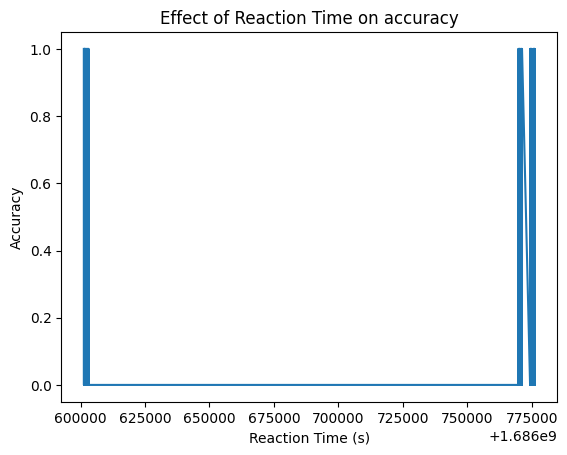

In [ ]:
analysis_pipeline.round('time',df)
analysis_pipeline.plot_accuracy('rounded_time',df,'Reaction Time (s)', 'Effect of Reaction Time on accuracy')

Index(['trial_num', 'time', 'block_id', 'visible', 'ltm', 'object_0_x',
       'object_0_y', 'object_0_id', 'object_0_theta', 'object_1_x',
       'object_1_y', 'object_1_id', 'object_1_theta', 'object_2_x',
       'object_2_y', 'object_2_id', 'object_2_theta', 'object_3_x',
       'object_3_y', 'object_3_id', 'object_3_theta', 'object_4_x',
       'object_4_y', 'object_4_id', 'object_4_theta', 'object_5_x',
       'object_5_y', 'object_5_id', 'object_5_theta', 'target_id', 'target_x',
       'target_y', 'target_theta', 'num_object', 'response_object_ind',
       'response_x', 'response_id', 'response_theta', 'correct', 'response_y',
       'visible_s', 'delay_s', 'rounded_delay_s', 'rounded_visible_s',
       'precision_difference_0', 'precision_difference_0_abs', 'rounded_time'],
      dtype='object')